# Personal Data
Please fill in your details below to help us keep track of your submission.

Student Name: `here`

Student ID: `here`

# Part1: Perceptron(65 points)

## Imports

In [ ]:
import pylab
from sklearn.datasets import make_classification
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# pick the seed for reproducability - change it to explore the effects of random variations
np.random.seed(1)
import random

## Toy Problem

To begin with, let's start with a toy problem, where we have two input features. For example, in medicine we may want to classify tumours into benign and malignant, depending on its size and age.

We will generate a random classification dataset using `make_classification` function from SciKit Learn library:

In [ ]:
n = 50

# TODO: Generate a random classification dataset with 2 features
X, Y = None, None   # 📣

# TODO: Convert initial 0/1 values into -1/1
Y = None

X = X.astype(np.float32); Y = Y.astype(np.int32) # features - float, label - int

# TODO: Split the dataset into training and test sets(train:80%, test:20%)
train_x, test_x = None, None
train_labels, test_labels = None, None

print("Features:\n", train_x[0:4])
print("Labels:\n", train_labels[0:4])


Features:
 [[-1.7441838  -1.3952037 ]
 [ 2.5921783  -0.08124504]
 [ 0.9218062   0.91789985]
 [-0.8437018  -0.18738253]]
Labels:
 [-1 -1  1 -1]


Let's also plot the dataset:

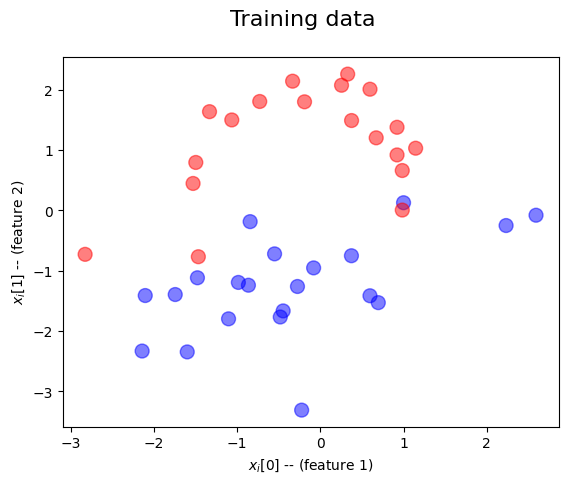

In [ ]:
def plot_dataset(suptitle, features, labels):
    #TODO:Prepare the plot
    pass

plot_dataset('Training data', train_x, train_labels)

## Perceptron

Since perceptron is a binary classifier, for each input vector $x$ the output of our perceptron would be either +1 or -1, depending on the class. The output will be computed using the formula

$$y(\mathbf{x}) = f(\mathbf{w}^{\mathrm{T}}\mathbf{x})$$

where $\mathbf{w}$ is a weight vector, $f$ is a step activation function:
$$
f(x) = \begin{cases}
         +1 & x \geq 0 \\
         -1 & x < 0
       \end{cases} \\
$$

However, a generic linear model should also have a bias, i.e. ideally we should compute $y$ as $y=f(\mathbf{w}^{\mathrm{T}}\mathbf{x}+\mathbf{b})$. To simplify our model, we can get rid of this bias term by adding one more dimension to our input features, which always equals to 1:

In [ ]:
pos_examples = # TODO: create an array of positive examples 
neg_examples = # TODO: create an array of negative examples

print(pos_examples[0:3])


[[ 0.92180622  0.91789985  1.        ]
 [-1.06435513  1.49764717  1.        ]
 [ 0.32839951  2.25677919  1.        ]]


## Training Algorithm

In order to train the perceptron, we need to find out weights $\mathbf{w}$ that will minimize the error. The error is defined using **perceptron criteria**:

$$E(\mathbf{w}) = -\sum_{n \in \mathcal{M}}\mathbf{w}^{\mathrm{T}}\mathbf{x}_{n}t_{n}$$

  * $t_{n} \in \{-1, +1\}$ for negative and positive training samples, respectively
  * $\mathcal{M}$ - a set of wrongly classified examples
  
We will use the process of **gradient descent**. Starting with some initial random weights $\mathbf{w}^{(0)}$, we will adjust weights on each step of the training using the gradient of $E$:

$$\mathbf{w}^{\tau + 1}=\mathbf{w}^{\tau} - \eta \nabla E(\mathbf{w}) = \mathbf{w}^{\tau} + \eta\sum_{n \in \mathcal{M}}\mathbf{x}_{n} t_{n}$$

where $\eta$ is a **learning rate**, and $\tau\in\mathbb{N}$ - number of iteration.

Let's define this algorithm in Python:

In [ ]:
class SimplePerceptron:
    def __init__(self, positive_examples, negative_examples, report_frequency=10):
        """
        Initialize the SimplePerceptron.

        :param report_frequency: How often (in epochs) we want to report accuracy.
        :param positive_examples: Numpy array of shape (num_pos_samples, num_features)
                                 containing all positive samples.
        :param negative_examples: Numpy array of shape (num_neg_samples, num_features)
                                 containing all negative samples.
        """
        self.positive_examples = positive_examples
        self.negative_examples = negative_examples
        self.report_frequency = report_frequency
        self.weights = None  # TODO: initialize weights if needed

    def train(self, epochs=100):
        """
        Train the SimplePerceptron on positive and negative examples for a given number of epochs.

        :param epochs: Number of epochs to train.
        """
        # TODO: Determine the dimensionality from self.positive_examples (num_dims)
        num_dims = None  # 📣

        # TODO: If self.weights is None, initialize it to zeros of shape (num_dims, 1)

        # TODO: Get counts of positive (pos_count) and negative (neg_count) examples
        pos_count = None 
        neg_count = None 

        for epoch in range(epochs):
            # TODO: pick one positive example (pos) at random from self.positive_examples
            pos = None  # 📣

            # TODO: pick one negative example (neg) at random from self.negative_examples
            neg = None

            # TODO: compute z_pos
            z_pos = None    # 📣

            # TODO: if z_pos < 0, update self.weights   # 📣

            # TODO: compute z_neg = dot product of neg with self.weights
            z_neg = None

            # TODO: if z_neg >= 0, update self.weights


            # TODO: every report_frequency epochs, compute accuracy and print   # 📣


        return self.weights


Now let's run the training on our dataset:

In [ ]:
SimplePerceptron = SimplePerceptron(pos_examples,neg_examples)
wts = SimplePerceptron.train(100)

Epoch=0, pos correct=0.631578947368421, neg correct=1.0
Epoch=10, pos correct=0.7894736842105263, neg correct=1.0
Epoch=20, pos correct=0.8947368421052632, neg correct=0.8571428571428571
Epoch=30, pos correct=0.8947368421052632, neg correct=0.9523809523809523
Epoch=40, pos correct=0.8421052631578947, neg correct=1.0
Epoch=50, pos correct=0.8947368421052632, neg correct=0.9523809523809523
Epoch=60, pos correct=0.8421052631578947, neg correct=1.0
Epoch=70, pos correct=0.9473684210526315, neg correct=0.9047619047619048
Epoch=80, pos correct=0.9473684210526315, neg correct=0.9523809523809523
Epoch=90, pos correct=0.8421052631578947, neg correct=1.0


As you can see, initial accuracy is around 50%, but it quickly increases to higher values close to 90%.

Let's visualize how classes are separated. Our classification function looks like $\mathbf{w}^Tx$, and it is greater than 0 for one class, and is below 0 for another. Thus, class separation line is defined by $\mathbf{w}^Tx = 0$. Since we have only two dimensions $x_0$ and $x_1$, the equation for the line would be $w_0x_0+w_1x_1+w_2 = 0$ (remember that we have explicitly defined an extra dimension $x_2=1$). Let's plot this line:

In [ ]:
def plot_boundary(positive_examples, negative_examples, weights):
    if np.isclose(weights[1], 0):
        if np.isclose(weights[0], 0):
            x = y = np.array([-6, 6], dtype = 'float32')
        else:
            y = np.array([-6, 6], dtype='float32')
            x = -(weights[1] * y + weights[2])/weights[0]
    else:
        x = np.array([-6, 6], dtype='float32')
        y = -(weights[0] * x + weights[2])/weights[1]

    pylab.xlim(-6, 6)
    pylab.ylim(-6, 6)
    pylab.plot(positive_examples[:,0], positive_examples[:,1], 'bo')
    pylab.plot(negative_examples[:,0], negative_examples[:,1], 'ro')
    pylab.plot(x, y, 'g', linewidth=2.0)
    pylab.show()

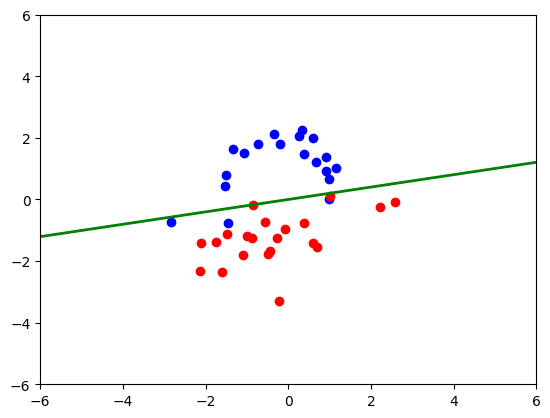

In [ ]:
plot_boundary(pos_examples,neg_examples,wts)

## Evaluate on Test Dataset

In the beginning, we have put apart some data to the test dataset. Let's see how accurate our classifier is on this test dataset. In order to do this, we also expand the test dataset with an extra dimension, multiply by weights matrix, and make sure that the obtained value is of the same sign as the label (+1 or -1). We then add together all boolean values and divide by the length of test sample, to obtain the accuracy:

In [ ]:
def accuracy(weights, test_x, test_labels):
    # TODO:Implement a function to compute the model’s accuracy:  

accuracy(wts, test_x, test_labels)

1.0

## Observing the training process

We have seen before how the accuracy decreases during training. It would be nice to see how the separation line behaves during training. The code below will visualize everything on one graph, and you should be able to move the slider to "time-travel" through the training process.

In [ ]:
class PerceptronTrainerGraph:
    def __init__(self, report_frequency=15):
        """
        Initializes the PerceptronTrainerGraph.

        :param report_frequency: How often to record snapshots during training.
        """
        self.report_frequency = report_frequency
        self.weights = None
        self.snapshots = None

    def train(self, positive_examples, negative_examples, num_iterations=100):
        """
        Trains the perceptron and stores snapshots of its performance.

        :param positive_examples: Numpy array of shape (num_positive, num_features).
        :param negative_examples: Numpy array of shape (num_negative, num_features).
        :param num_iterations:   Number of training iterations.
        :return:                 Numpy array of snapshots, where each snapshot includes
                                 the weights and a small list storing accuracy metrics.
        """
        # TODO: Determine the number of dimensions from positive_examples/negative_examples
        num_dims = None

        # TODO: If self.weights is None, initialize it to zeros

        # TODO: Store snapshots in a list
        snapshots = []

        for i in range(num_iterations):
            # TODO: pick a random positive example from positive_examples
            pos = None

            # TODO: pick a random negative example from negative_examples
            neg = None

            # TODO: update self.weights if the positive example is misclassified

            # TODO: update self.weights if the negative example is misclassified

            # TODO: every report_frequency iterations, compute accuracy and append a snapshot
            if i % self.report_frequency == 0:
                #TODO: Create an entry combining flattened weights + a list for other data
                snapshots.append(...)

        # TODO: convert snapshots to a NumPy array if needed
        self.snapshots = None
        return self.snapshots

    def plot(self, pos_examples, neg_examples, step, plot_boundary_function):
        """
        Plots the decision boundary at a specific training 'step', as well as
        the recorded accuracy over training snapshots.

        :param pos_examples:           Numpy array of positive examples.
        :param neg_examples:           Numpy array of negative examples.
        :param step:                   Index in self.snapshots to visualize.
        :param plot_boundary_function: A function that draws the decision boundary,
                                       e.g. the user's existing 'plot_boundary' method.
        """
        if self.snapshots is None:
            raise ValueError("No snapshots to plot. Make sure to call train() first.")
        if step < 0 or step >= len(self.snapshots):
            raise IndexError(f"Step must be between 0 and {len(self.snapshots)-1}.")
        fig = pylab.figure(figsize=(10, 4))

        # TODO: create a figure with two subplots (decision boundary and accuracy)  
        ax1 = fig.add_subplot(1, 2, 1)

        # TODO: call plot_boundary_function with the appropriate weights from self.snapshots
        ax1.set_title(f"Decision Boundary at step={step}")


        ax2 = fig.add_subplot(1, 2, 2)
        # TODO: plot accuracy over snapshots, mark the chosen step  
        accuracies = None #TODO
        ax2.plot(...) #TODO
        ax2.set_ylabel('Accuracy')
        ax2.set_xlabel('Snapshot Index')
        ax2.plot(...) #TODO
        ax2.set_title("Accuracy Over Snapshots")


trainer = PerceptronTrainerGraph(report_frequency=15)
snapshots = trainer.train(pos_examples, neg_examples, num_iterations=100)

def plotit(pos_examples,neg_examples,snapshots,step):
    fig = pylab.figure(figsize=(10,4))
    fig.add_subplot(1, 2, 1)
    plot_boundary(pos_examples, neg_examples, snapshots[step][0])
    fig.add_subplot(1, 2, 2)
    pylab.plot(np.arange(len(snapshots[:,1])), snapshots[:,1])
    pylab.ylabel('Accuracy')
    pylab.xlabel('Iteration')
    pylab.plot(step, snapshots[step,1][0], "bo")
    pylab.show()
def pl1(step): plotit(pos_examples,neg_examples,snapshots,step)


In [ ]:
interact(pl1, step=widgets.IntSlider(value=0, min=0, max=len(snapshots)-1))

interactive(children=(IntSlider(value=0, description='step', max=6), Output()), _dom_classes=('widget-interact…

<function __main__.pl1(step)>

## Limitations of the Perceptron

As you have seen above, perceptron is a **linear classifier**. It can distinguish between two classes well if they are **linearly separable**, i.e. can be separated by a straight line. Otherwise, perceptron training process will not converge.

A most obvious example of a problem that cannot be solved by a perceptron is so-called **XOR problem**. We want our perceptron to learn the XOR boolean function.

Let's try and do that! We will manually populate all positive and negative training samples, and then call our train function defined above:

In [ ]:
# TODO: Define XOR positive examples
pos_examples_xor = None # 📣

# TODO: Define XOR negative examples
neg_examples_xor = None

# TODO: Instantiate PerceptronTrainerGraph
trainer_xor = None

# TODO: Train the perceptron on XOR data
snapshots_xor = None

def pl2(step): plotit(pos_examples_xor,neg_examples_xor,snapshots_xor,step)


In [ ]:
interact(pl2, step=widgets.IntSlider(value=0, min=0, max=len(snapshots)-1))

interactive(children=(IntSlider(value=0, description='step', max=6), Output()), _dom_classes=('widget-interact…

<function __main__.pl2(step)>

# Part2: Logistic Regression(20 points)

## Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Enable inline plotting
%matplotlib inline

##Logistic Regression Theory

Logistic regression is a fundamental method for binary classification. It models the probability that an example belongs to a particular class using the **sigmoid** function:

$$ h_{\theta}(x) = \frac{1}{1+e^{-\theta^T x}} $$

The cost function used to train the model is given by:

$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\Big[y^{(i)}\log(h_{\theta}(x^{(i)})) + (1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))\Big] $$

We use **gradient descent** to iteratively update the parameters:

$$ \theta := \theta - \alpha \nabla J(\theta) $$



##Synthetic Binary Classification

In this experiment, we generate a **linearly separable** dataset using `make_classification`. We will pretend it’s analogous to a typical two-feature binary classification scenario. The dataset contains two features (X[:,0] and X[:,1]) and a binary target (y).

In [2]:
# TODO: Create a synthetic, linearly separable dataset
def load_data():
    # TODO: use make_classification(...)
    X, y = None, None
    return X, y

# TODO: Load the synthetic dataset
X_train, y_train = None, None  # e.g. load_data()

print("First five elements in X_train:")
print(X_train[:5])
print("First five elements in y_train:")
print(y_train[:5])
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Number of training examples:", len(y_train))

First five elements in X_train:
[[-0.01759094  0.47383292]
 [-0.21508153 -0.03471177]
 [ 0.78804649  0.71400049]
 [ 0.44900079  0.62566735]
 [ 0.79443245 -0.44651495]]
First five elements in y_train:
[1 0 1 1 1]
Shape of X_train: (100, 2)
Shape of y_train: (100,)
Number of training examples: 100


### Visualizing the Data

Let's plot the two features. Here, points labeled `1` and `0` are marked differently.

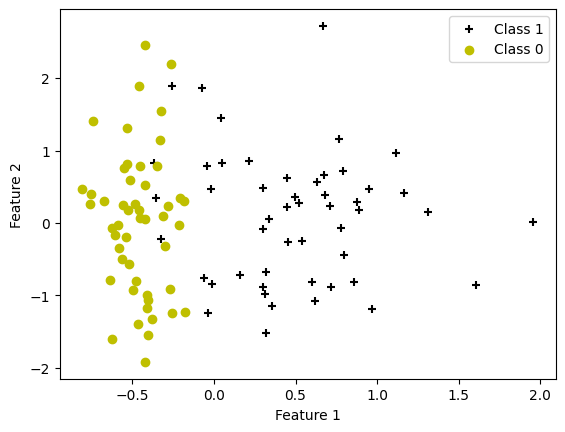

In [ ]:
def plot_data(X, y):
# TODO:#plot the data points in two classes (0 and 1),
    pass

plot_data(X_train, y_train)

### Logistic Regression Implementation

Below, we define the sigmoid function, the cost function, and the gradient descent algorithm to train our logistic regression model.

In [ ]:
def sigmoid(z):
    # TODO: implement the sigmoid function
    return None # 📣

def compute_cost(theta, X, y):
    # TODO: implement the logistic regression cost function
    m = None # num of smaples
    h = None #output 
    epsilon = 1e-5  # to avoid log(0)   # 📣
    cost = None
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    # TODO: implement gradient descent
    m = None #num of samples
    cost_history = []

    for i in range(num_iters):
        h = None #output   
        theta -= None   # 📣
        cost_history.append(None)
    return theta, cost_history

# TODO: Add intercept term to our synthetic data
X_train_with_intercept = None   

# TODO: Initialize theta to zeros of shape
theta_initial = None   

# TODORun gradient descent
theta_final, cost_history = None, None      

# Print the final cost
print("Final cost:", cost_history[-1])


Final cost: 0.3556256356565386


### Plotting the Decision Boundary

The decision boundary is given by the equation:

$$ \theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0 $$

We plot this boundary along with the data.

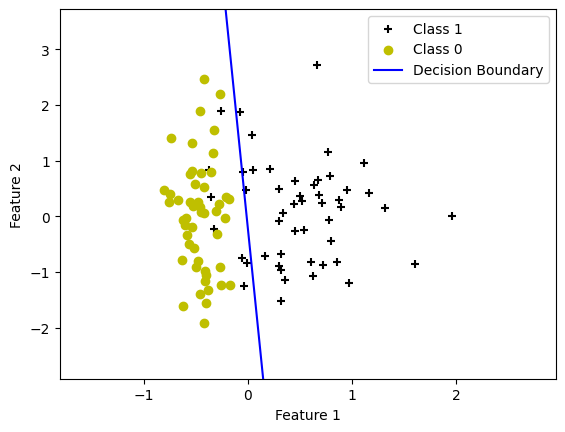

In [ ]:
def plot_decision_boundary(theta, X, y):    
    #plot data and decision boundry
    pass


plot_decision_boundary(theta_final, X_train_with_intercept, y_train)

### Evaluating the Model

We predict the class labels using a threshold of 0.5 and compute the training accuracy.

In [6]:
def predict(theta, X):
    return sigmoid(X.dot(theta)) >= 0.5

predictions = predict(theta_final, X_train_with_intercept)
accuracy = accuracy_score(y_train, predictions)
print("Training accuracy: {:.2f}%".format(accuracy * 100))

Training accuracy: 93.00%


# Perceptron VS Logistic Regression(15 points)

In this note, we see the implementation of **Logistic Regression** and the **Perceptron** algorithm. Below are a few questions comparing these two methods, followed by concise answers for each.

---

### 1. How do Logistic Regression and the Perceptron differ in terms of their decision boundaries?

**Answer**:  


---

### 2. What are the key differences in the outputs of Logistic Regression and the Perceptron?

**Answer**:  

---

### 3. Under what conditions does the Perceptron converge, and how does this compare to Logistic Regression?

**Answer**:  

---

### 4. How does each algorithm handle misclassified examples?

**Answer**:  



---

### 5. How do the two algorithms behave when the data is not linearly separable?

**Answer**:  

---
